# Collaborative Modelling
Does looking at the collaborative condition change the likelihood of interaction with widgets? (When compared to a single searcher condition like before)

## Data
* `full_session` considered the entire search session, over all groups (consisting of two users), over each topic.
* `query0` - `query7` denotes the interactions that take place within a search session while `0` to `7` queries have been issued.
* `saved0` - `saved7` denotes the interactions that take place while `0` to `7` documents have been saved.

`queryX` and `savedY` are used to get an idea of how interactions vary over the course of search sessions, on average.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

%matplotlib inline

In [9]:
path_full_session = 'data/woroles-combined/fullsession.csv'

saved_0_session = 'data/woroles-combined/saved0.csv'
saved_1_session = 'data/woroles-combined/saved1.csv'
saved_2_session = 'data/woroles-combined/saved2.csv'
saved_3_session = 'data/woroles-combined/saved3.csv'
saved_4_session = 'data/woroles-combined/saved4.csv'
saved_5_session = 'data/woroles-combined/saved5.csv'
saved_6_session = 'data/woroles-combined/saved6.csv'
saved_7_session = 'data/woroles-combined/saved7.csv'

queries_0_session = 'data/woroles-combined/query0.csv'
queries_1_session = 'data/woroles-combined/query1.csv'
queries_2_session = 'data/woroles-combined/query2.csv'
queries_3_session = 'data/woroles-combined/query3.csv'
queries_4_session = 'data/woroles-combined/query4.csv'
queries_5_session = 'data/woroles-combined/query5.csv'
queries_6_session = 'data/woroles-combined/query6.csv'
queries_7_session = 'data/woroles-combined/query7.csv'

In [10]:
full_df = pd.read_csv(path_full_session)

saved0_df = pd.read_csv(saved_0_session)
saved1_df = pd.read_csv(saved_1_session)
saved2_df = pd.read_csv(saved_2_session)
saved3_df = pd.read_csv(saved_3_session)
saved4_df = pd.read_csv(saved_4_session)
saved5_df = pd.read_csv(saved_5_session)
saved6_df = pd.read_csv(saved_6_session)
saved7_df = pd.read_csv(saved_7_session)

query0_df = pd.read_csv(queries_0_session)
query1_df = pd.read_csv(queries_1_session)
query2_df = pd.read_csv(queries_2_session)
query3_df = pd.read_csv(queries_3_session)
query4_df = pd.read_csv(queries_4_session)
query5_df = pd.read_csv(queries_5_session)
query6_df = pd.read_csv(queries_6_session)
query7_df = pd.read_csv(queries_7_session)

## Compute Individual Session Hover Percentages
Take each session individually, and work out the percentage of interactions on the different interface components.

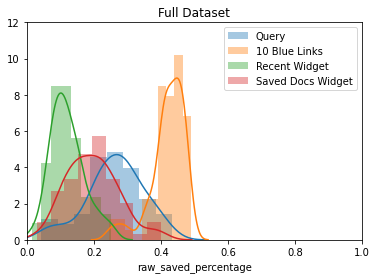

In [25]:
def compute_session_percentages(df, name):
    """
    Computes per-session interaction percentages, adding columns to the given DataFrame.
    """
    df['raw_total'] = df['raw_query'] + df['raw_results'] + df['raw_recent'] + df['raw_saved']
    df['raw_query_percentage'] = df['raw_query'] / df['raw_total']
    df['raw_results_percentage'] = df['raw_results'] / df['raw_total']
    df['raw_recent_percentage'] = df['raw_recent'] / df['raw_total']
    df['raw_saved_percentage'] = df['raw_saved'] / df['raw_total']
    
    sns.distplot(df['raw_query_percentage'], label='Query')
    sns.distplot(df['raw_results_percentage'], label='10 Blue Links')
    sns.distplot(df['raw_recent_percentage'], label='Recent Widget')
    sns.distplot(df['raw_saved_percentage'], label='Saved Docs Widget')
    
    plt.title(name)
    plt.legend()
    plt.xlim([0, 1.0])
    plt.ylim([0, 12])
    plt.show()

compute_session_percentages(full_df, 'Full Dataset')

## Compute Raw Percentages
Computing this value by summing over all observations, and then dividing by the sum.

In [26]:
def compute_raw_percentages(totals_df, df, name):
    """
    Adds the percentage columns to the given DataFrame for raw hover counts.
    """
    df['raw_sum'] = df['raw_query'] + df['raw_results'] + df['raw_recent'] + df['raw_saved']
    
    totals_df = totals_df.append({'name': name,
                                  'raw_sum': df['raw_sum'].sum(),
                                  'raw_query_sum': df['raw_query'].sum(),
                                  'raw_results_sum': df['raw_results'].sum(),
                                  'raw_recent_sum': df['raw_recent'].sum(),
                                  'raw_saved_sum': df['raw_saved'].sum(),
                                  
                                  'raw_query_percentage': df['raw_query'].sum() / df['raw_sum'].sum(),
                                  'raw_results_percentage': df['raw_results'].sum() / df['raw_sum'].sum(),
                                  'raw_recent_percentage': df['raw_recent'].sum() / df['raw_sum'].sum(),
                                  'raw_saved_percentage': df['raw_saved'].sum() / df['raw_sum'].sum(),
                                 },
                                 ignore_index=True)
    
    return totals_df

In [28]:
totals_df = pd.DataFrame(columns=['name', 'raw_sum', 'raw_query_sum', 'raw_results_sum', 'raw_recent_sum', 'raw_saved_sum', 'raw_query_percentage', 'raw_results_percentage', 'raw_recent_percentage', 'raw_saved_percentage'])

# For each dataset, work out the percentages by calling compute_raw_percentages()
totals_df = compute_raw_percentages(totals_df, full_df, 'full')

totals_df = compute_raw_percentages(totals_df, saved0_df, 'saved0')
totals_df = compute_raw_percentages(totals_df, saved1_df, 'saved1')
totals_df = compute_raw_percentages(totals_df, saved2_df, 'saved2')
totals_df = compute_raw_percentages(totals_df, saved3_df, 'saved3')
totals_df = compute_raw_percentages(totals_df, saved4_df, 'saved4')
totals_df = compute_raw_percentages(totals_df, saved5_df, 'saved5')
totals_df = compute_raw_percentages(totals_df, saved6_df, 'saved6')
totals_df = compute_raw_percentages(totals_df, saved7_df, 'saved7')

totals_df = compute_raw_percentages(totals_df, query0_df, 'queries0')
totals_df = compute_raw_percentages(totals_df, query1_df, 'queries1')
totals_df = compute_raw_percentages(totals_df, query2_df, 'queries2')
totals_df = compute_raw_percentages(totals_df, query3_df, 'queries3')
totals_df = compute_raw_percentages(totals_df, query4_df, 'queries4')
totals_df = compute_raw_percentages(totals_df, query5_df, 'queries5')
totals_df = compute_raw_percentages(totals_df, query6_df, 'queries6')
totals_df = compute_raw_percentages(totals_df, query7_df, 'queries7')

totals_df

,name,raw_sum,raw_query_sum,raw_results_sum,raw_recent_sum,raw_saved_sum,raw_query_percentage,raw_results_percentage,raw_recent_percentage,raw_saved_percentage
0,full,10185,2661,4177,1264,2083,0.261267,0.410113,0.124104,0.204516
1,saved0,736,324,308,99,5,0.440217,0.418478,0.134511,0.006793
2,saved1,603,187,288,65,63,0.310116,0.477612,0.107794,0.104478
3,saved2,720,208,339,90,83,0.288889,0.470833,0.125000,0.115278
4,saved3,596,182,300,58,56,0.305369,0.503356,0.097315,0.093960
5,saved4,802,186,353,132,131,0.231920,0.440150,0.164589,0.163342
6,saved5,630,150,295,67,118,0.238095,0.468254,0.106349,0.187302
7,saved6,715,180,314,91,130,0.251748,0.439161,0.127273,0.181818
8,saved7,518,125,232,59,102,0.241313,0.447876,0.113900,0.196911
9,queries0,127,89,18,14,6,0.700787,0.141732,0.110236,0.047244


## Plotting the Percentage of Interactions as Widget Content Increases
Given the raw data above, what do the percentages tell us as the number of items in the two widgets we are looking increases?

In [31]:
def plot_interactions_as_widget_increases(raw_data, title, xlabel, ylabel):
    df = pd.DataFrame(columns=['name', 'raw_sum', 'raw_query_sum', 'raw_results_sum', 'raw_recent_sum', 'raw_saved_sum', 'raw_query_percentage', 'raw_results_percentage', 'raw_recent_percentage', 'raw_saved_percentage'])
    df = compute_raw_percentages(df, raw_data[0], 0)
    df = compute_raw_percentages(df, raw_data[1], 1)
    df = compute_raw_percentages(df, raw_data[2], 2)
    df = compute_raw_percentages(df, raw_data[3], 3)
    df = compute_raw_percentages(df, raw_data[4], 4)
    df = compute_raw_percentages(df, raw_data[5], 5)
    df = compute_raw_percentages(df, raw_data[6], 6)
    df = compute_raw_percentages(df, raw_data[7], 7)

    sns.lineplot(df['name'], df['raw_recent_percentage'], label="Recent queries interactions")
    sns.lineplot(df['name'], df['raw_saved_percentage'], label="Previous saved documents interactions")
    sns.lineplot(df['name'], df['raw_query_percentage'], label="Query box interactions (approx.)")
    sns.lineplot(df['name'], df['raw_results_percentage'], label="Results (10 blue links) interactions")

    plt.title(title)
    plt.legend()
    plt.ylabel(xlabel)
    plt.ylim([0, 0.75])
    plt.xlabel(ylabel)
    
    df.head()

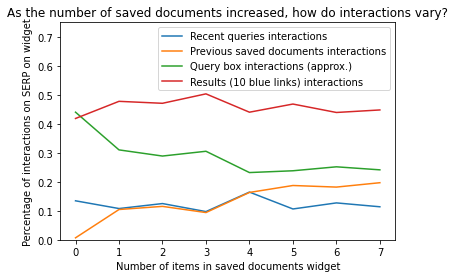

In [32]:
saved_data = [
    saved0_df,
    saved1_df,
    saved2_df,
    saved3_df,
    saved4_df,
    saved5_df,
    saved6_df,
    saved7_df,
]

plot_interactions_as_widget_increases(saved_data,
                                      'As the number of saved documents increased, how do interactions vary?',
                                      'Percentage of interactions on SERP on widget',
                                      'Number of items in saved documents widget')

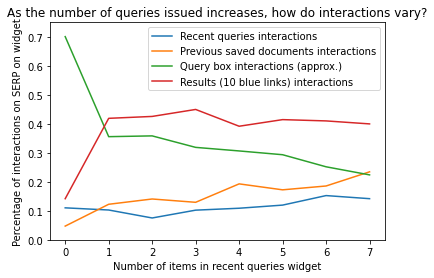

In [33]:
query_data = [
    query0_df,
    query1_df,
    query2_df,
    query3_df,
    query4_df,
    query5_df,
    query6_df,
    query7_df,
]

plot_interactions_as_widget_increases(query_data,
                                      'As the number of queries issued increases, how do interactions vary?',
                                      'Percentage of interactions on SERP on widget',
                                      'Number of items in recent queries widget')

## Considering Markov Models
What are the transition likelihoods from state-to-state?

In [35]:
def compute_state_transition_likelihoods(totals_df, df, name):
    """
    Computes percentages of the total number of transition events.
    """
    df['query_sum'] = df['query2results'] + df['query2recent'] + df['query2saved']
    df['results_sum'] = df['results2query'] + df['results2recent'] + df['results2saved']
    df['recent_sum'] = df['recent2query'] + df['recent2results'] + df['recent2saved']
    df['saved_sum'] = df['saved2query'] + df['saved2results'] + df['saved2recent']
    
    totals_df = totals_df.append({'name': name,
                                  'query_sum': df['query_sum'].sum(),
                                  'query2results': df['query2results'].sum() / df['query_sum'].sum() * 100,
                                  'query2recent': df['query2recent'].sum() / df['query_sum'].sum() * 100,
                                  'query2saved': df['query2saved'].sum() / df['query_sum'].sum() * 100,
                                  
                                  'results_sum': df['results_sum'].sum(),
                                  'results2query': df['results2query'].sum() / df['results_sum'].sum() * 100,
                                  'results2recent': df['results2recent'].sum() / df['results_sum'].sum() * 100,
                                  'results2saved': df['results2saved'].sum() / df['results_sum'].sum() * 100,
                                  
                                  'recent_sum': df['recent_sum'].sum(),
                                  'recent2query': df['recent2query'].sum() / df['recent_sum'].sum() * 100,
                                  'recent2results': df['recent2results'].sum() / df['recent_sum'].sum() * 100,
                                  'recent2saved': df['recent2saved'].sum() / df['recent_sum'].sum() * 100,
                                  
                                  'saved_sum': df['saved_sum'].sum(),
                                  'saved2query': df['saved2query'].sum() / df['saved_sum'].sum() * 100,
                                  'saved2results': df['saved2results'].sum() / df['saved_sum'].sum() * 100,
                                  'saved2recent': df['saved2recent'].sum() / df['saved_sum'].sum() * 100,
                                 },
                                 ignore_index=True)
    
    return totals_df
    
#totals_df = pd.DataFrame(columns=['name', 'query_sum', 'results_sum', 'recent_sum', 'saved_sum'])
totals_df = pd.DataFrame()

totals_df = compute_state_transition_likelihoods(totals_df, full_df, 'full')

totals_df = compute_state_transition_likelihoods(totals_df, saved0_df, 'saved0')
totals_df = compute_state_transition_likelihoods(totals_df, saved1_df, 'saved1')
totals_df = compute_state_transition_likelihoods(totals_df, saved2_df, 'saved2')
totals_df = compute_state_transition_likelihoods(totals_df, saved3_df, 'saved3')
totals_df = compute_state_transition_likelihoods(totals_df, saved4_df, 'saved4')
totals_df = compute_state_transition_likelihoods(totals_df, saved5_df, 'saved5')
totals_df = compute_state_transition_likelihoods(totals_df, saved6_df, 'saved6')
totals_df = compute_state_transition_likelihoods(totals_df, saved7_df, 'saved7')

totals_df = compute_state_transition_likelihoods(totals_df, query0_df, 'query0')
totals_df = compute_state_transition_likelihoods(totals_df, query1_df, 'query1')
totals_df = compute_state_transition_likelihoods(totals_df, query2_df, 'query2')
totals_df = compute_state_transition_likelihoods(totals_df, query3_df, 'query3')
totals_df = compute_state_transition_likelihoods(totals_df, query4_df, 'query4')
totals_df = compute_state_transition_likelihoods(totals_df, query5_df, 'query5')
totals_df = compute_state_transition_likelihoods(totals_df, query6_df, 'query6')



totals_df

,name,query2recent,query2results,query2saved,query_sum,recent2query,recent2results,recent2saved,recent_sum,results2query,results2recent,results2saved,results_sum,saved2query,saved2recent,saved2results,saved_sum
0,full,14.242653,72.343632,13.413715,2654.0,21.780604,60.095390,18.124006,1258.0,48.755738,15.100266,36.143996,4139.0,14.791465,12.463628,72.744908,2062.0
1,saved0,19.620253,80.063291,0.316456,316.0,43.877551,55.102041,1.020408,98.0,86.530612,13.469388,0.000000,245.0,100.000000,0.000000,0.000000,5.0
2,saved1,12.637363,80.769231,6.593407,182.0,25.396825,58.730159,15.873016,63.0,69.333333,12.888889,17.777778,225.0,15.873016,17.460317,66.666667,63.0
3,saved2,11.386139,80.198020,8.415842,202.0,15.730337,65.168539,19.101124,89.0,63.405797,18.840580,17.753623,276.0,17.073171,15.853659,67.073171,82.0
4,saved3,8.139535,85.465116,6.395349,172.0,15.517241,79.310345,5.172414,58.0,68.181818,14.462810,17.355372,242.0,5.454545,12.727273,81.818182,55.0
5,saved4,20.441989,67.955801,11.602210,181.0,17.424242,63.636364,18.939394,132.0,48.096886,22.837370,29.065744,289.0,12.213740,21.374046,66.412214,131.0
6,saved5,10.416667,72.222222,17.361111,144.0,14.925373,70.149254,14.925373,67.0,48.319328,17.226891,34.453782,238.0,17.699115,7.964602,74.336283,113.0
7,saved6,17.714286,67.428571,14.857143,175.0,23.333333,62.222222,14.444444,90.0,48.846154,16.923077,34.230769,260.0,21.705426,12.403101,65.891473,129.0
8,saved7,19.130435,60.869565,20.000000,115.0,33.898305,54.237288,11.864407,59.0,48.087432,13.661202,38.251366,183.0,15.000000,11.000000,74.000000,100.0
9,query0,33.333333,57.142857,9.523810,21.0,57.142857,35.714286,7.142857,14.0,81.250000,18.750000,0.000000,16.0,100.000000,0.000000,0.000000,5.0
